In [24]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Load the dataset
df = pd.read_csv('Vaccination Data.csv')

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Calculate the normalized values for each criterion
scaler = preprocessing.MinMaxScaler()
criteria = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
            'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
            'daily_vaccinations_per_million']

df_norm = df.copy()
df_norm[criteria] = scaler.fit_transform(df_norm[criteria])

# Define weights for each criterion
weights = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2])

# Perform MCDM using weighted sum approach
df_norm['score'] = np.dot(df_norm[criteria], weights)

# Sort the dataframe by score in descending order
df_norm = df_norm.sort_values(by='score', ascending=False)

# Display the top results
print(df_norm.head())


     country       date  total_vaccinations  people_vaccinated  \
1200   China 2021-12-28            0.856759           0.987790   
1283   China 2022-03-21            0.989960           0.999367   
1280   China 2022-03-18            0.986389           0.998644   
1286   China 2022-03-24            0.994015           1.000000   
1279   China 2022-03-17            0.984875           0.998376   

      people_fully_vaccinated  total_vaccinations_per_hundred  \
1200                 0.973110                        0.856776   
1283                 0.999707                        0.989997   
1280                 0.999137                        0.986412   
1286                 1.000000                        0.994025   
1279                 0.999027                        0.984907   

      people_vaccinated_per_hundred  daily_vaccinations_per_million  \
1200                       0.987772                        0.389735   
1283                       0.999321                        0.140487   

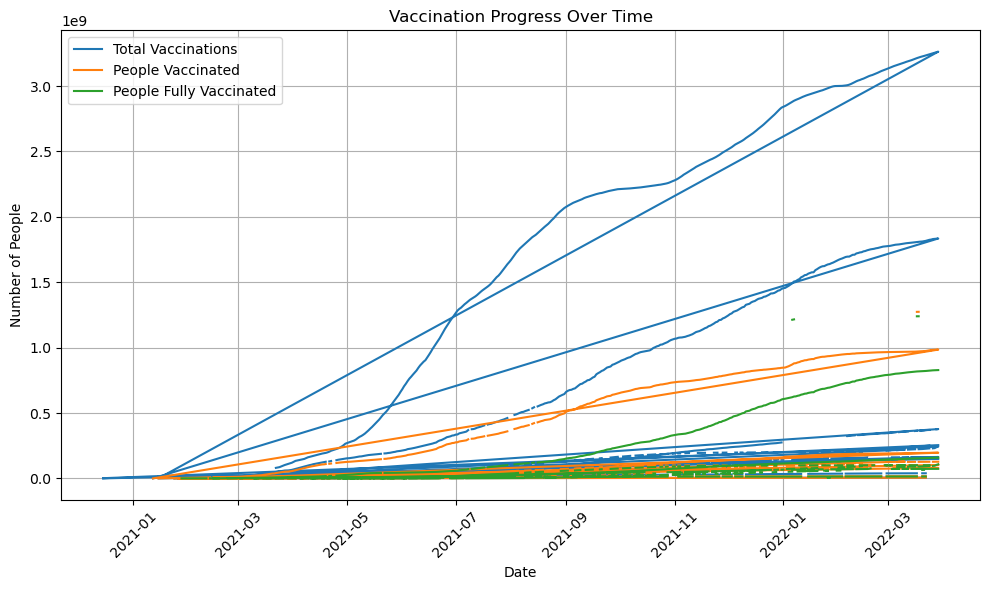

In [25]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['total_vaccinations'], label='Total Vaccinations')
plt.plot(df['date'], df['people_vaccinated'], label='People Vaccinated')
plt.plot(df['date'], df['people_fully_vaccinated'], label='People Fully Vaccinated')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title('Vaccination Progress Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_19300\3055813464.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
F:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


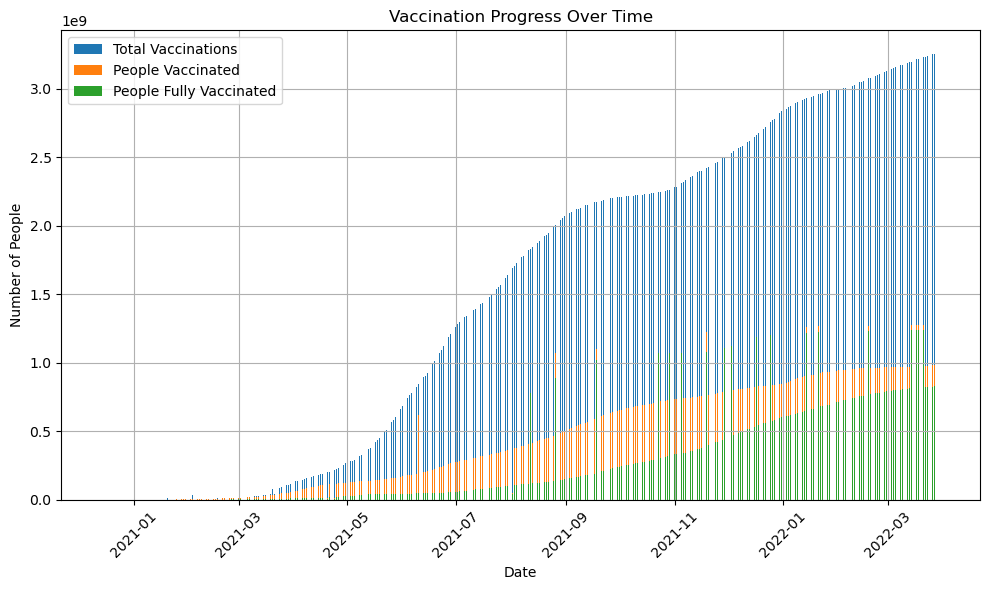

In [26]:
import matplotlib.pyplot as plt

# Define data for plotting
dates = df['date']
total_vaccinations = df['total_vaccinations']
people_vaccinated = df['people_vaccinated']
people_fully_vaccinated = df['people_fully_vaccinated']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(dates, total_vaccinations, width=0.3, align='center', label='Total Vaccinations')
plt.bar(dates, people_vaccinated, width=0.3, align='center', label='People Vaccinated')
plt.bar(dates, people_fully_vaccinated, width=0.3, align='center', label='People Fully Vaccinated')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title('Vaccination Progress Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


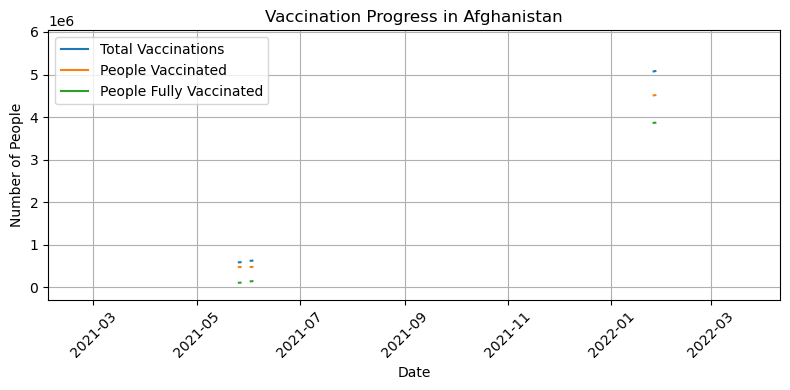

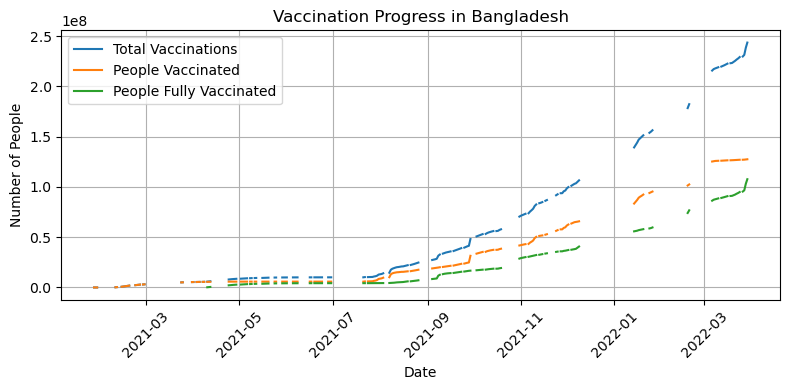

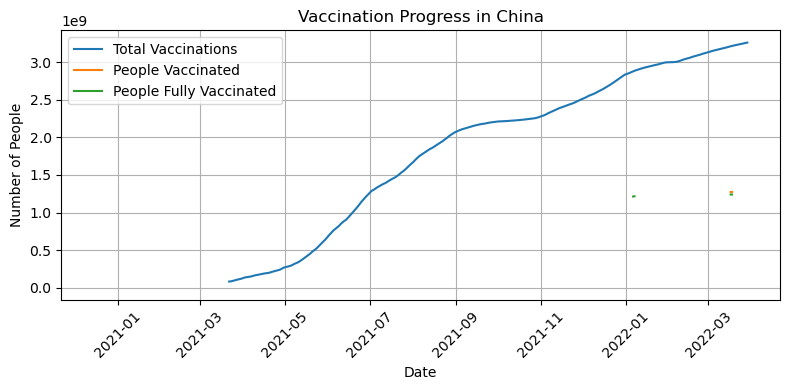

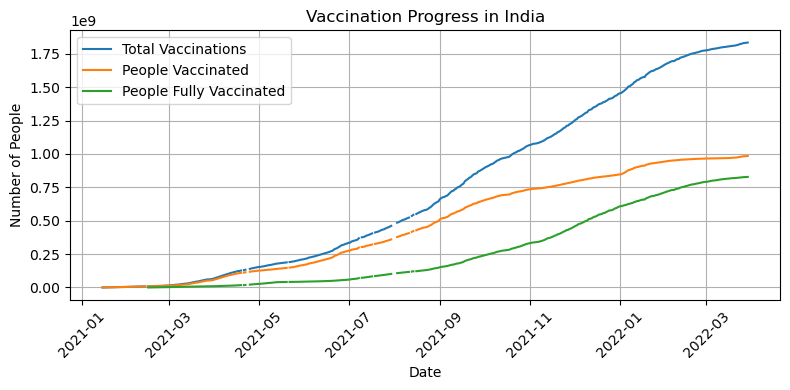

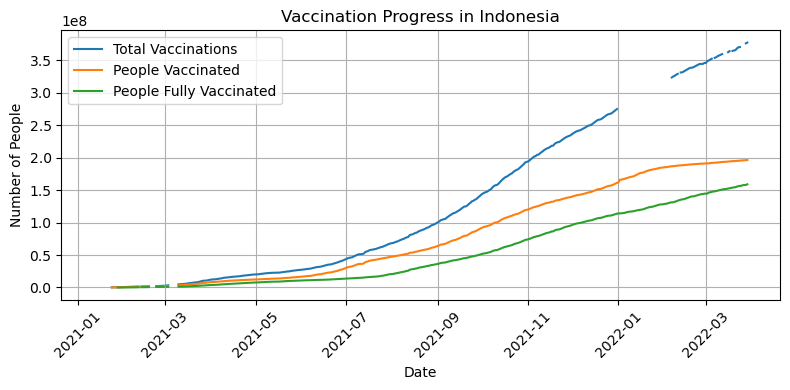

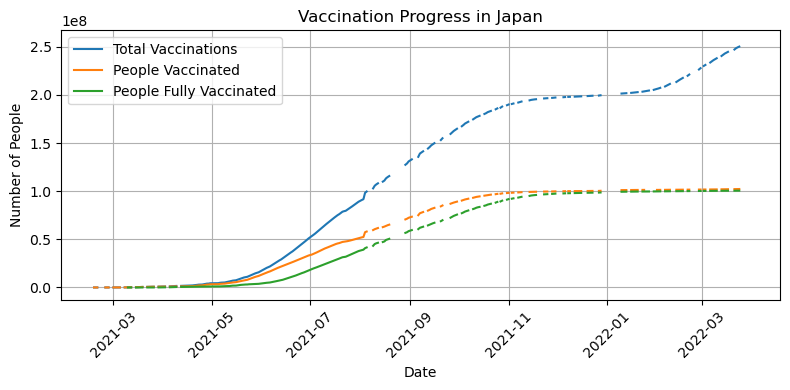

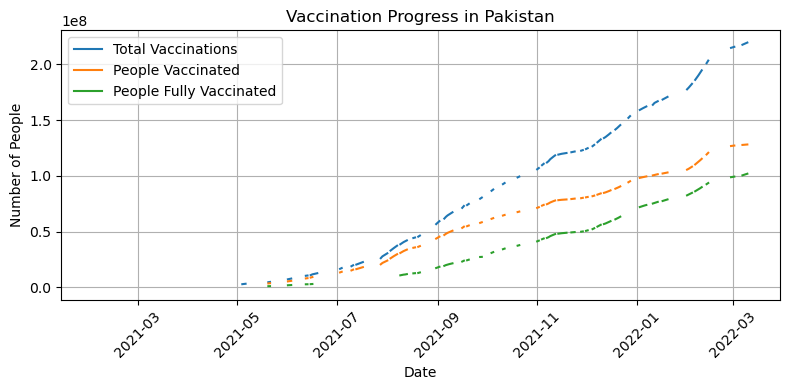

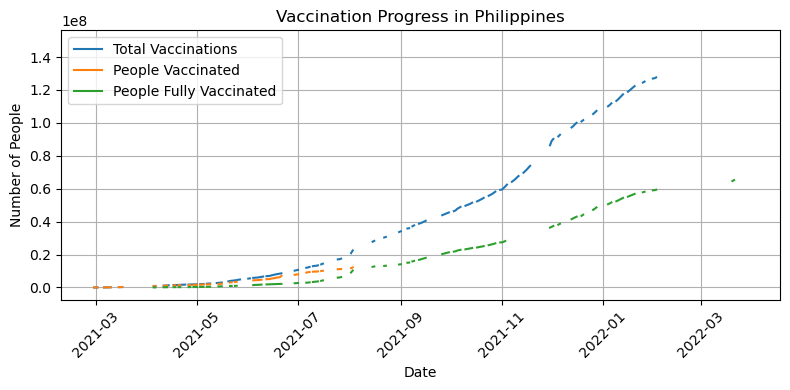

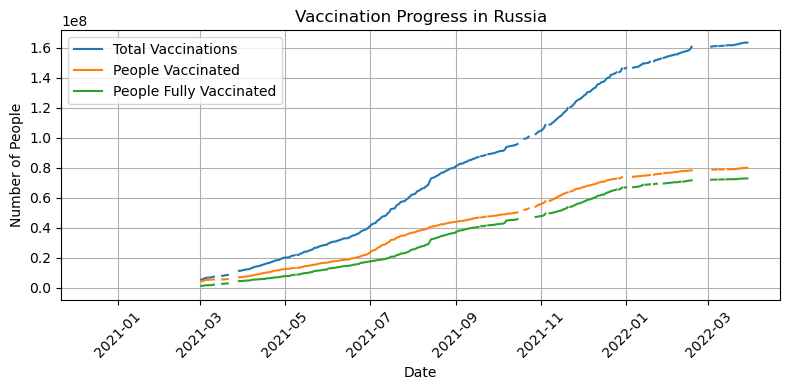

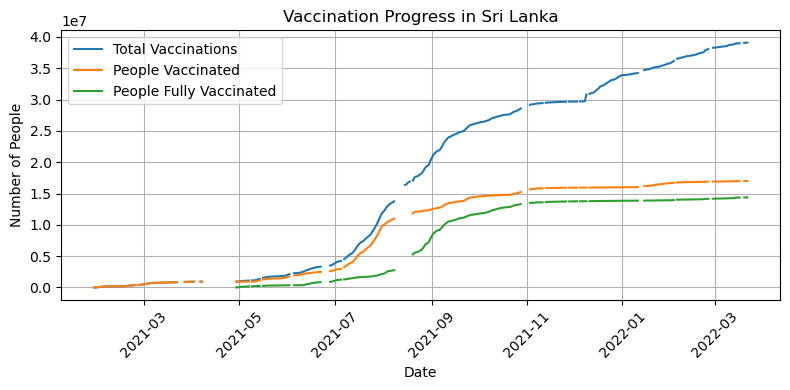

In [28]:
import matplotlib.pyplot as plt

# Get unique countries in the dataset
unique_countries = df['country'].unique()

# Plotting for each country
for country in unique_countries:
    country_data = df[df['country'] == country]
    
    plt.figure(figsize=(8, 4))
    plt.plot(country_data['date'], country_data['total_vaccinations'], label='Total Vaccinations')
    plt.plot(country_data['date'], country_data['people_vaccinated'], label='People Vaccinated')
    plt.plot(country_data['date'], country_data['people_fully_vaccinated'], label='People Fully Vaccinated')
    plt.title(f'Vaccination Progress in {country}')
    plt.xlabel('Date')
    plt.ylabel('Number of People')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
